In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [146]:
df_train = pd.read_csv('train.csv')

In [147]:
df_train.shape

(891, 12)

In [148]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [150]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [151]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [152]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
df_train = df_train.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis =1)

In [154]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [155]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [156]:
df_train.Age.median()  

28.0

In [157]:
age_class = df_train.groupby(['Pclass']).mean()['Age'].values

In [158]:
age_class

array([38.23344086, 29.87763006, 25.14061972])

In [159]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return age_class[0]
        if Pclass == 2:
            return age_class[1]
        if Pclass == 3:
            return age_class[2]
    else:
        return Age
    

In [160]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [161]:
#df_train['Embarked'] = df_train['Embarked'].fillna(str((df_train['Embarked'].mode().values)[0]))

In [162]:
df_train.shape

(891, 8)

In [163]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [164]:
df_train.dropna(inplace=True)

In [168]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [169]:
#df_train['Sex_dummy'] = pd.get_dummies(df_train['Sex'], prefix='sex', drop_first=True )

In [170]:
df_train_dummied = pd.get_dummies(df_train, columns=['Sex','Embarked'])

In [171]:
df_train_dummied

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00000,1,0,7.2500,0,1,0,0,1
1,1,1,38.00000,1,0,71.2833,1,0,1,0,0
2,1,3,26.00000,0,0,7.9250,1,0,0,0,1
3,1,1,35.00000,1,0,53.1000,1,0,0,0,1
4,0,3,35.00000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,0,1,0,0,1
887,1,1,19.00000,0,0,30.0000,1,0,0,0,1
888,0,3,25.14062,1,2,23.4500,1,0,0,0,1
889,1,1,26.00000,0,0,30.0000,0,1,1,0,0


<AxesSubplot:>

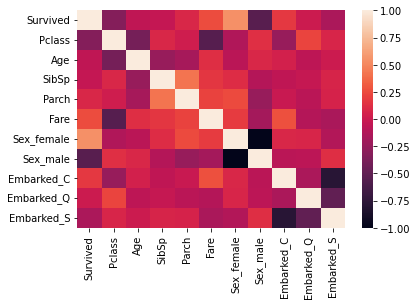

In [172]:
sns.heatmap(df_train_dummied.corr())

In [177]:
used_features = ["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

In [187]:
X = df_train_dummied[used_features]

In [188]:
X

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.00000,1,0,0,1,0,0,1
1,1,38.00000,1,0,1,0,1,0,0
2,3,26.00000,0,0,1,0,0,0,1
3,1,35.00000,1,0,1,0,0,0,1
4,3,35.00000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,0,1,0,0,1
887,1,19.00000,0,0,1,0,0,0,1
888,3,25.14062,1,2,1,0,0,0,1
889,1,26.00000,0,0,0,1,1,0,0


In [189]:
y = df_train_dummied['Survived']

In [190]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [198]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [199]:
Lin_M_1 = LogisticRegression()

In [200]:
Lin_M_1.fit(X_train,y_train)

LogisticRegression()

In [207]:
Predict_1 = Lin_M_1.predict(X_test)

In [208]:
metrics.confusion_matrix(y_test,Predict_1)

array([[143,  23],
       [ 20,  81]], dtype=int64)

In [209]:
y_test.value_counts()

0    166
1    101
Name: Survived, dtype: int64

In [215]:
np.unique(Predict_1, return_counts=True)[1]

array([163, 104], dtype=int64)

In [216]:
metrics.accuracy_score(y_test,Predict_1)

0.8389513108614233

In [218]:
print(classification_report(y_test,Predict_1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       166
           1       0.78      0.80      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [220]:
Lin_M_1.predict_proba(X_test)

array([[0.26468723, 0.73531277],
       [0.39806176, 0.60193824],
       [0.94756151, 0.05243849],
       [0.25311958, 0.74688042],
       [0.94409587, 0.05590413],
       [0.13447943, 0.86552057],
       [0.33068485, 0.66931515],
       [0.5185017 , 0.4814983 ],
       [0.77915075, 0.22084925],
       [0.40568973, 0.59431027],
       [0.7405154 , 0.2594846 ],
       [0.20912852, 0.79087148],
       [0.75359986, 0.24640014],
       [0.14382788, 0.85617212],
       [0.86337426, 0.13662574],
       [0.36738514, 0.63261486],
       [0.89337269, 0.10662731],
       [0.2973166 , 0.7026834 ],
       [0.17646949, 0.82353051],
       [0.39525022, 0.60474978],
       [0.90445182, 0.09554818],
       [0.55029376, 0.44970624],
       [0.86436533, 0.13563467],
       [0.93734224, 0.06265776],
       [0.51444841, 0.48555159],
       [0.5156679 , 0.4843321 ],
       [0.03848453, 0.96151547],
       [0.86807133, 0.13192867],
       [0.90156895, 0.09843105],
       [0.32900807, 0.67099193],
       [0.